In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('netflix_users.csv')
df

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14
...,...,...,...,...,...,...,...,...
24995,24996,David Miller,18,Australia,Premium,183.88,Horror,2025-01-18
24996,24997,Jane Miller,17,USA,Premium,112.37,Drama,2024-06-29
24997,24998,Sarah Miller,14,USA,Premium,351.80,Action,2024-10-16
24998,24999,Michael Williams,71,USA,Basic,655.89,Action,2024-08-27


In [3]:
df.describe()

,User_ID,Age,Watch_Time_Hours
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,46.482880,500.468858
std,7217.022701,19.594861,286.381815
min,1.000000,13.000000,0.120000
25%,6250.750000,29.000000,256.567500
50%,12500.500000,46.000000,501.505000
75%,18750.250000,63.000000,745.732500
max,25000.000000,80.000000,999.990000


<b><h2>User Behaviour Analysis </h2></b>

<p>1.	What is the average watch time for each subscription type (Basic, Standard, Premium)?</p>

In [4]:
df.groupby('Subscription_Type')['Watch_Time_Hours'].mean()

Subscription_Type
Basic       502.994617
Premium     501.409387
Standard    496.949376
Name: Watch_Time_Hours, dtype: float64

<p>2.	Which age group spends the most time watching Netflix?</p>

In [5]:
# Create age groups
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Find the average watch time for each age group
df.groupby('Age_Group')['Watch_Time_Hours'].mean()


C:\Users\Viral Shah\AppData\Local\Temp\ipykernel_19284\784053933.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Watch_Time_Hours'].mean()


Age_Group
10-20    492.794896
21-30    499.102570
31-40    506.533787
41-50    496.595258
51-60    498.723507
61-70    503.026071
71-80    505.165006
Name: Watch_Time_Hours, dtype: float64

<p>3.	What is the most popular genre by country?</p>

In [6]:
df.groupby('Country')['Favorite_Genre'].agg(lambda x: x.value_counts().idxmax())
# df.groupby('Country')['Favorite_Genre'].value_counts().idxmax()


Country
Australia    Documentary
Brazil           Romance
Canada            Action
France       Documentary
Germany           Sci-Fi
India            Romance
Japan        Documentary
Mexico       Documentary
UK                Horror
USA          Documentary
Name: Favorite_Genre, dtype: object

<p>4.	How does watch time vary across different countries?</p>

In [7]:
df.groupby('Country')['Watch_Time_Hours'].sum().astype(str)+ ' Hour'

Country
Australia    1238500.79 Hour
Brazil       1261391.37 Hour
Canada       1273443.87 Hour
France       1251435.06 Hour
Germany      1259665.39 Hour
India        1233067.52 Hour
Japan         1215774.5 Hour
Mexico       1237744.23 Hour
UK           1285800.67 Hour
USA          1254898.05 Hour
Name: Watch_Time_Hours, dtype: object

<p>5.	What is the average watch time for users with Premium vs Basic subscriptions?</p>

In [8]:
AvgWatchTime = df[df['Subscription_Type'].isin(['Premium', 'Basic'])]
AvgWatchTime.groupby('Subscription_Type')['Watch_Time_Hours'].mean()

Subscription_Type
Basic      502.994617
Premium    501.409387
Name: Watch_Time_Hours, dtype: float64

<b><h2>Subscription Type Analysis</h2></b>

<p>6.Which subscription type is more popular among different age groups?</p>

In [9]:
# Creating age groups
bins = [0, 18, 30, 45, 60, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Counting subscription types by age group
df.groupby('Age_Group')['Subscription_Type'].value_counts()


C:\Users\Viral Shah\AppData\Local\Temp\ipykernel_19284\571692609.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Subscription_Type'].value_counts()


Age_Group    Subscription_Type
Teen         Basic                 751
             Standard              724
             Premium               713
Young Adult  Basic                1509
             Premium              1497
             Standard             1471
Adult        Premium              1856
             Basic                1827
             Standard             1797
Middle Age   Premium              1887
             Basic                1843
             Standard             1801
Senior       Premium              2449
             Standard             2449
             Basic                2426
Name: count, dtype: int64

<p>7.What percentage of users are on Premium, Standard, and Basic subscriptions?</p>

In [10]:
df['Subscription_Type'].value_counts(normalize=True) * 100

Subscription_Type
Premium     33.608
Basic       33.424
Standard    32.968
Name: proportion, dtype: float64

<p>8.How does the watch time differ between Premium and Basic users?</p>

In [11]:
WatchTimeDifference=df.groupby('Subscription_Type')['Watch_Time_Hours'].sum()
WatchTimeDifference['Premium'] - WatchTimeDifference['Basic']



9818.650000000373

<p>9.What is the average watch time for each subscription type over time?</p>

In [12]:
df.groupby('Subscription_Type')['Watch_Time_Hours'].mean()

Subscription_Type
Basic       502.994617
Premium     501.409387
Standard    496.949376
Name: Watch_Time_Hours, dtype: float64

<b><h2>Demographic Analysis</h2></b>

<p>10.	What is the age distribution of Netflix users?</p>

In [13]:
df.groupby('Age_Group')['User_ID'].count()

C:\Users\Viral Shah\AppData\Local\Temp\ipykernel_19284\4162333058.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['User_ID'].count()


Age_Group
Teen           2188
Young Adult    4477
Adult          5480
Middle Age     5531
Senior         7324
Name: User_ID, dtype: int64

<p>11.	Which country has the highest number of active users?</p>

In [14]:
df.groupby('Country')['Watch_Time_Hours'].sum()

Country
Australia    1238500.79
Brazil       1261391.37
Canada       1273443.87
France       1251435.06
Germany      1259665.39
India        1233067.52
Japan        1215774.50
Mexico       1237744.23
UK           1285800.67
USA          1254898.05
Name: Watch_Time_Hours, dtype: float64

<P>12.	What is the average watch time for users from the USA, UK, France, and Germany?</p>

In [15]:
df.groupby('Country')['Watch_Time_Hours'].mean().loc[['USA','UK','France','Germany']]


Country
USA        501.357591
UK         496.065073
France     506.039248
Germany    494.568272
Name: Watch_Time_Hours, dtype: float64

<p>13.	Are older users more likely to have a Basic subscription?</p>

In [16]:
df.groupby(['Age_Group', 'Subscription_Type'])['User_ID'].count()

C:\Users\Viral Shah\AppData\Local\Temp\ipykernel_19284\2161983214.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age_Group', 'Subscription_Type'])['User_ID'].count()


Age_Group    Subscription_Type
Teen         Basic                 751
             Premium               713
             Standard              724
Young Adult  Basic                1509
             Premium              1497
             Standard             1471
Adult        Basic                1827
             Premium              1856
             Standard             1797
Middle Age   Basic                1843
             Premium              1887
             Standard             1801
Senior       Basic                2426
             Premium              2449
             Standard             2449
Name: User_ID, dtype: int64

<b><h2>Time-Based Analysis</h2></b>

<p>14.	What is the monthly active user count based on the 'Last_Login' date?</p>

In [27]:
df['Last_Login'] = pd.to_datetime(df['Last_Login'])

df['Month_Year'] = df['Last_Login'].dt.to_period('M')

df.groupby('Month_Year')['User_ID'].count()

Month_Year
2024-03    1564
2024-04    2149
2024-05    2112
2024-06    1998
2024-07    2081
2024-08    2082
2024-09    2074
2024-10    2151
2024-11    2009
2024-12    2150
2025-01    2111
2025-02    1973
2025-03     546
Freq: M, Name: User_ID, dtype: int64

In [35]:
df['Last_Login'] =pd.to_datetime(df['Last_Login'])
df['day']=df['Last_Login'].dt.day_name()
df['Day_Type'] = df['day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
df.groupby('Day_Type')['Watch_Time_Hours'].sum()

Day_Type
Weekday    8882750.75
Weekend    3628970.70
Name: Watch_Time_Hours, dtype: float64

<p>16.	How has user activity changed from 2024 to 2025?</p>

In [56]:
df['year']=df['Last_Login'].dt.year
df.groupby('year')['User_ID'].count()

year
2024    20370
2025     4630
Name: User_ID, dtype: int64

<p>17.	Which month had the highest average watch time?</p>

In [61]:
df['Month']=df['Last_Login'].dt.month
df.groupby('Month')['Watch_Time_Hours'].mean()

Month
1     495.904893
2     502.223360
3     502.906573
4     496.361643
5     496.523594
6     489.076271
7     498.883354
8     495.393098
9     503.844672
10    502.504240
11    508.952887
12    512.745005
Name: Watch_Time_Hours, dtype: float64

<b><h2>User Retention & Engagement</h2></b>

<p>18.	What is the average watch time for users who log in frequently?</p>

In [65]:
# Step 1: Count how many times each user logged in
login_count = df['User_ID'].value_counts()

# Step 2: Filter users who logged in more than 3 times (frequent users)
frequent_users = login_count[login_count > 3].index

# Step 3: Filter the original DataFrame for only frequent users
frequent_users_data = df[df['User_ID'].isin(frequent_users)]

# Step 4: Calculate the average watch time of these frequent users
average_watch_time = frequent_users_data['Watch_Time_Hours'].mean()

# Step 5: Print the result
print("Average Watch Time for Frequent Users:", average_watch_time)


Average Watch Time for Frequent Users: nan


<p>19.	What percentage of users churned (stopped watching) after a specific period?</p>

In [68]:
import pandas as pd

# Step 1: Convert 'Last_Login' to datetime
df['Last_Login'] = pd.to_datetime(df['Last_Login'])

# Step 2: Find the latest login date in the dataset
latest_date = df['Last_Login'].max()

# Step 3: Define churn period (3 months from the latest login date)
churn_period = latest_date - pd.DateOffset(months=3)

# Step 4: Identify churned users (users who haven't logged in for the last 3 months)
churned_users = df[df['Last_Login'] < churn_period]

# Step 5: Calculate churn rate
churn_rate = (len(churned_users) / len(df)) * 100

# Step 6: Print the result
print("Churn Rate:", round(churn_rate, 2), "%")


Churn Rate: 74.72 %


<b><h2>Visualizations using Matplotlib</h2></b>

<p>Bar plot: Watch time by subscription type</p>

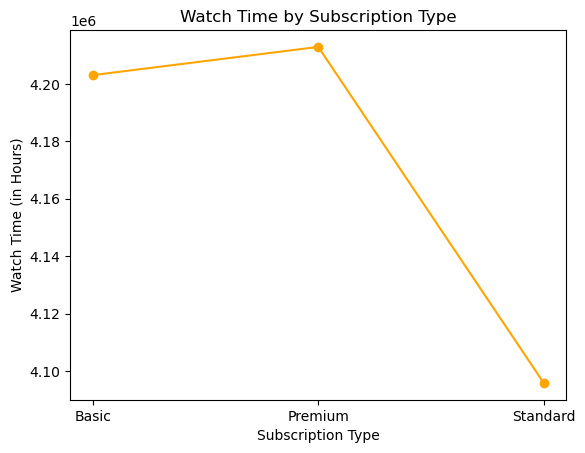

In [76]:
x = df.groupby('Subscription_Type')['Watch_Time_Hours'].sum().index
y = df.groupby('Subscription_Type')['Watch_Time_Hours'].sum().values

plt.plot(x, y, marker='o', color='orange')
plt.xlabel('Subscription Type')
plt.ylabel('Watch Time (in Hours)')
plt.title('Watch Time by Subscription Type')
plt.show()

<p>Pie chart: Subscription type distribution</p>

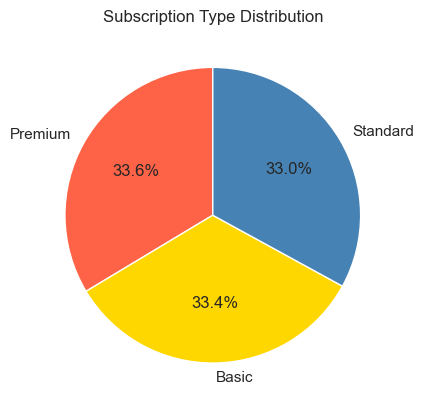

In [92]:
sub_count=df['Subscription_Type'].value_counts()

plt.pie(sub_count, labels=sub_count.index, autopct='%1.1f%%', startangle=90, colors=['#FF6347', '#FFD700', '#4682B4'])
plt.title('Subscription Type Distribution')
plt.show()


<p>Line plot: Watch time trend over months</p>

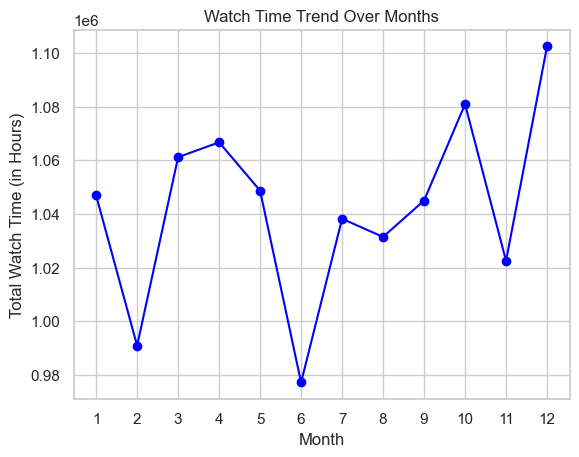

In [107]:
df['month'] = df['Last_Login'].dt.month

# Group by month and sum watch time
monthly_watch_time = df.groupby('month')['Watch_Time_Hours'].sum()

# Plot line chart
plt.plot(monthly_watch_time.index, monthly_watch_time.values, marker='o', color='blue', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Watch Time (in Hours)')
plt.title('Watch Time Trend Over Months')
plt.xticks(range(1, 13))  # Show months from 1 to 12
plt.show()

<p>Histogram: Age distribution of users</p>

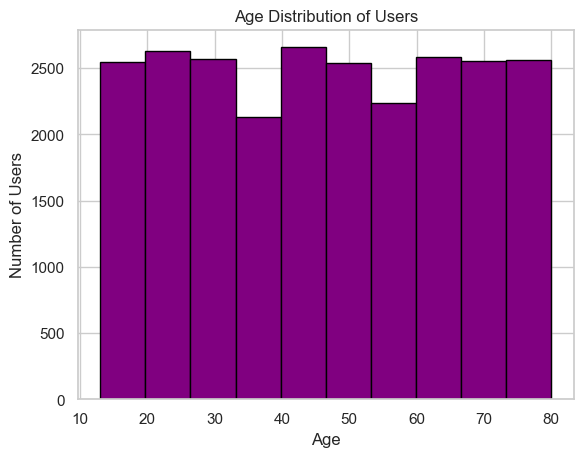

In [121]:
df['user'] = df['Age'].count
plt.hist(df['Age'], bins=10, color='purple', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Age Distribution of Users')
plt.grid(True)
plt.show()